# Clustering for Diversification analysis

Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.

# Query 6.1
Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Creating a funtion to get the name of company and closing price

In [2]:
def get_close(comp):
    cp = pd.read_csv(comp)
    return cp['Close Price']

def comp_name(paths):
    table ={}
    for file in paths:
        table[file] = get_close(file)
    return table

In [3]:
paths = ['ADANIPORTS.csv','ASIANPAINT.csv','AXISBANK.csv','BAJFINANCE.csv','BPCL.csv',
         'CIPLA.csv','DRREDDY.csv','EICHERMOT.csv','GAIL.csv','HEROMOTOCO.csv',
        'ADANIPOWER.csv','AJANTPHARM.csv','AMARAJABAT.csv','APOLLOTYRE.csv','BERGEPAINT.csv',
         'CASTROLIND.csv','CUMMINSIND.csv','GODREJIND.csv','EXIDEIND.csv','GMRINFRA.csv',
        'ASHOKA.csv','FORTIS.csv','IDFC.csv','JETAIRWAYS.csv','CENTURYPLY.csv',
         'BOMDYEING.csv','ITDC.csv','GUJALKALI.csv','BAJAJELEC.csv','IRCON.csv']

In [4]:
dict_table =comp_name(paths)
df_stocks = pd.DataFrame(dict_table)
df_stocks=df_stocks.dropna()
df_stocks.tail()

,ADANIPORTS.csv,ASIANPAINT.csv,AXISBANK.csv,BAJFINANCE.csv,BPCL.csv,CIPLA.csv,DRREDDY.csv,EICHERMOT.csv,GAIL.csv,HEROMOTOCO.csv,...,ASHOKA.csv,FORTIS.csv,IDFC.csv,JETAIRWAYS.csv,CENTURYPLY.csv,BOMDYEING.csv,ITDC.csv,GUJALKALI.csv,BAJAJELEC.csv,IRCON.csv
146,402.50,1117.40,538.60,1699.25,498.95,591.65,2256.35,28598.65,491.90,3441.70,...,241.20,138.70,59.75,677.70,333.95,234.60,510.85,730.85,480.00,398.20
147,394.00,1116.55,535.75,1671.80,506.30,578.15,2260.70,28721.25,491.80,3419.45,...,235.60,128.00,58.75,677.60,326.60,233.70,504.45,709.65,467.20,394.30
148,395.10,1123.45,541.45,1685.85,513.55,590.45,2310.65,28738.70,487.10,3460.55,...,232.25,130.50,57.80,675.50,322.20,228.30,499.25,694.95,451.30,399.95
149,401.35,1118.70,547.95,1729.60,523.05,576.45,2371.50,29478.70,485.65,3503.00,...,237.95,135.15,57.30,703.05,336.75,266.75,510.90,735.70,467.85,395.45
150,404.60,1137.15,548.65,1756.85,526.40,591.65,2395.00,29909.40,496.00,3535.35,...,241.00,135.65,57.95,693.45,334.65,280.90,515.95,746.20,477.15,385.75


In [5]:
df_stocks.insert(0, "Date", value = pd.read_csv('IRCON.csv')['Date'].values)
df_stocks.Date = pd.to_datetime(df_stocks.Date)
df_stocks.tail()

,Date,ADANIPORTS.csv,ASIANPAINT.csv,AXISBANK.csv,BAJFINANCE.csv,BPCL.csv,CIPLA.csv,DRREDDY.csv,EICHERMOT.csv,GAIL.csv,...,ASHOKA.csv,FORTIS.csv,IDFC.csv,JETAIRWAYS.csv,CENTURYPLY.csv,BOMDYEING.csv,ITDC.csv,GUJALKALI.csv,BAJAJELEC.csv,IRCON.csv
146,2019-05-07,402.50,1117.40,538.60,1699.25,498.95,591.65,2256.35,28598.65,491.90,...,241.20,138.70,59.75,677.70,333.95,234.60,510.85,730.85,480.00,398.20
147,2019-05-08,394.00,1116.55,535.75,1671.80,506.30,578.15,2260.70,28721.25,491.80,...,235.60,128.00,58.75,677.60,326.60,233.70,504.45,709.65,467.20,394.30
148,2019-05-09,395.10,1123.45,541.45,1685.85,513.55,590.45,2310.65,28738.70,487.10,...,232.25,130.50,57.80,675.50,322.20,228.30,499.25,694.95,451.30,399.95
149,2019-05-10,401.35,1118.70,547.95,1729.60,523.05,576.45,2371.50,29478.70,485.65,...,237.95,135.15,57.30,703.05,336.75,266.75,510.90,735.70,467.85,395.45
150,2019-05-13,404.60,1137.15,548.65,1756.85,526.40,591.65,2395.00,29909.40,496.00,...,241.00,135.65,57.95,693.45,334.65,280.90,515.95,746.20,477.15,385.75


# Query 6.2
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [6]:
stock_names = list(dict_table.keys())
stock_names

['ADANIPORTS.csv',
 'ASIANPAINT.csv',
 'AXISBANK.csv',
 'BAJFINANCE.csv',
 'BPCL.csv',
 'CIPLA.csv',
 'DRREDDY.csv',
 'EICHERMOT.csv',
 'GAIL.csv',
 'HEROMOTOCO.csv',
 'ADANIPOWER.csv',
 'AJANTPHARM.csv',
 'AMARAJABAT.csv',
 'APOLLOTYRE.csv',
 'BERGEPAINT.csv',
 'CASTROLIND.csv',
 'CUMMINSIND.csv',
 'GODREJIND.csv',
 'EXIDEIND.csv',
 'GMRINFRA.csv',
 'ASHOKA.csv',
 'FORTIS.csv',
 'IDFC.csv',
 'JETAIRWAYS.csv',
 'CENTURYPLY.csv',
 'BOMDYEING.csv',
 'ITDC.csv',
 'GUJALKALI.csv',
 'BAJAJELEC.csv',
 'IRCON.csv']

In [7]:
def get_return_and_vol(data, stock_names):
    stock_return ={}
    for stock in stock_names:
        ret = data[stock].pct_change()*100
        stock_return[stock] = (ret.mean()*252, ret.std()*np.sqrt(252))
    return stock_return

annual_return_vol = get_return_and_vol(df_stocks, stock_names)
annual_return_vol

{'ADANIPORTS.csv': (24.882953247298065, 26.318336924286474),
 'ASIANPAINT.csv': (0.14280980241693944, 18.8059873933886),
 'AXISBANK.csv': (19.107198143089022, 26.643537030161273),
 'BAJFINANCE.csv': (50.98632801273348, 30.327636900170514),
 'BPCL.csv': (-39.012921628224404, 50.61389049869647),
 'CIPLA.csv': (10.223934395979324, 27.114374745532785),
 'DRREDDY.csv': (-13.526689859936896, 32.176764695405666),
 'EICHERMOT.csv': (8.151037005134842, 22.7153926683157),
 'GAIL.csv': (34.33323380742161, 28.422518107011168),
 'HEROMOTOCO.csv': (2.527312217490778, 17.851212621471603),
 'ADANIPOWER.csv': (37.9544707186048, 46.212316237080735),
 'AJANTPHARM.csv': (-16.36552674470097, 31.10947410364676),
 'AMARAJABAT.csv': (-28.370551977144586, 25.270415278161817),
 'APOLLOTYRE.csv': (20.944591922035393, 31.653810062609217),
 'BERGEPAINT.csv': (-1.0643949132197923, 26.60422005386022),
 'CASTROLIND.csv': (-11.345958018577972, 18.557876310137917),
 'CUMMINSIND.csv': (-34.514858558379466, 25.8605010364

In [8]:
returns = np.array([a[0] for a in annual_return_vol.values()])
volatility = np.array([a[1] for a in annual_return_vol.values()])
df_return = pd.DataFrame({'Companies':list(annual_return_vol.keys()), 'Annual % returns': returns, 'Annual % volatility':volatility})
df_return

,Companies,Annual % returns,Annual % volatility
0,ADANIPORTS.csv,24.882953,26.318337
1,ASIANPAINT.csv,0.142810,18.805987
2,AXISBANK.csv,19.107198,26.643537
3,BAJFINANCE.csv,50.986328,30.327637
4,BPCL.csv,-39.012922,50.613890
5,CIPLA.csv,10.223934,27.114375
6,DRREDDY.csv,-13.526690,32.176765
7,EICHERMOT.csv,8.151037,22.715393
8,GAIL.csv,34.333234,28.422518
9,HEROMOTOCO.csv,2.527312,17.851213


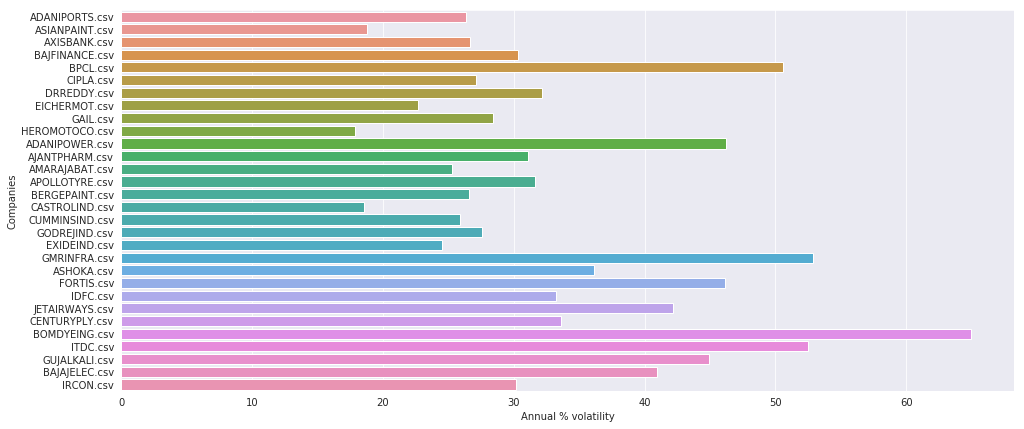

In [9]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 16,7
ax = sns.barplot(x ='Annual % volatility', y='Companies', data = df_return)

# Query 6.3
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

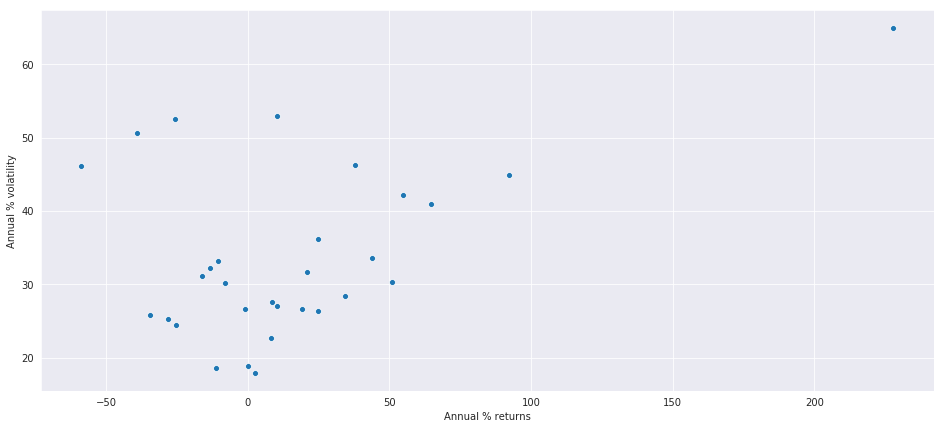

In [17]:
from sklearn.cluster import KMeans
sns.scatterplot(x='Annual % returns', y='Annual % volatility', data =df_return)

In [18]:
kmeans = KMeans(n_clusters = 4)
df_return['Cluster'] = kmeans.fit_predict(df_return[['Annual % returns', 'Annual % volatility']])
df_return.head()

,Companies,Annual % returns,Annual % volatility,Cluster
0,ADANIPORTS.csv,24.882953,26.318337,2
1,ASIANPAINT.csv,0.142810,18.805987,2
2,AXISBANK.csv,19.107198,26.643537,2
3,BAJFINANCE.csv,50.986328,30.327637,1
4,BPCL.csv,-39.012922,50.613890,0


In [19]:
centroids = kmeans.cluster_centers_
centroids

array([[-24.66581875,  33.64309412],
       [ 57.37546926,  39.68889836],
       [ 13.57426993,  28.56116594],
       [227.82171683,  64.98225448]])

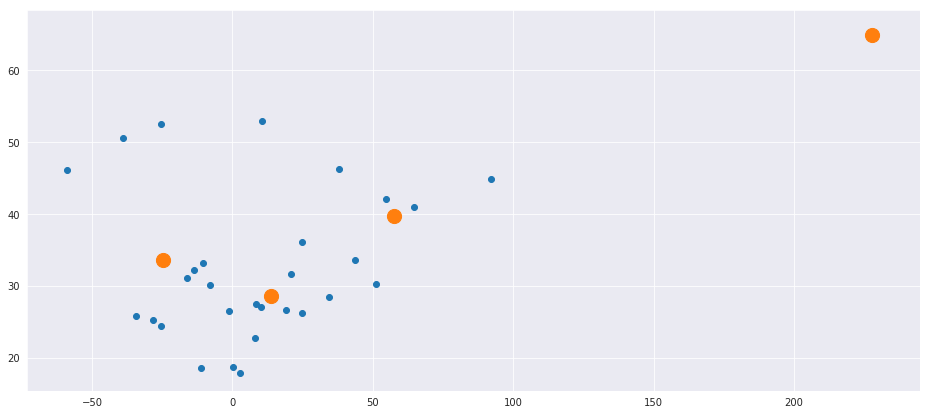

In [20]:
plt.scatter(x ='Annual % returns', y= 'Annual % volatility', data = df_return)
plt.scatter(centroids[:,0], centroids[:,1], s=200)

More visualization of data points and cluster

In [21]:
cl1 = df_return[df_return.Cluster == 0]
cl2 = df_return[df_return.Cluster == 1]
cl3 = df_return[df_return.Cluster == 2]
cl4 = df_return[df_return.Cluster == 3]

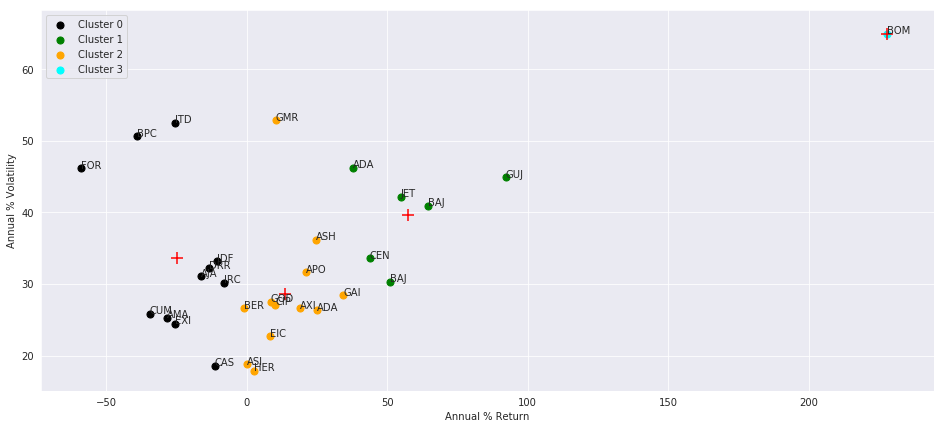

In [22]:
plt.scatter(cl1['Annual % returns'], cl1['Annual % volatility'], label ='Cluster 0', s =50, color ='black')
plt.scatter(cl2['Annual % returns'], cl2['Annual % volatility'], label ='Cluster 1', s =50, color ='green')
plt.scatter(cl3['Annual % returns'], cl3['Annual % volatility'], label ='Cluster 2', s =50, color ='orange')
plt.scatter(cl4['Annual % returns'], cl4['Annual % volatility'], label ='Cluster 3', s =50, color ='cyan')

plt.scatter(centroids[:,0], centroids[:,1], s=150, marker ='+', color ='red')

for i,txt in enumerate(stock_names):
    plt.annotate(txt[:3], (returns[i], volatility[i]))
plt.xlabel('Annual % Return')
plt.ylabel('Annual % Volatility')
plt.legend()

### Optimization in KMeans using Elbow Method

In [28]:
wcss = []
K = range(1,10)
for k in K:
    kmean_model = KMeans(n_clusters = k)
    kmean_model.fit(df_return[['Annual % returns', 'Annual % volatility']])
    wcss.append(kmean_model.inertia_)

wcss

[82850.56176068056,
 35193.93022952205,
 14068.734221892275,
 7948.1582907330385,
 5704.677153585945,
 4112.655500135536,
 3030.1865050824085,
 2660.068770599716,
 1812.1233585827008]

Text(0,0.5,'Within-cluster Sum of Squares')

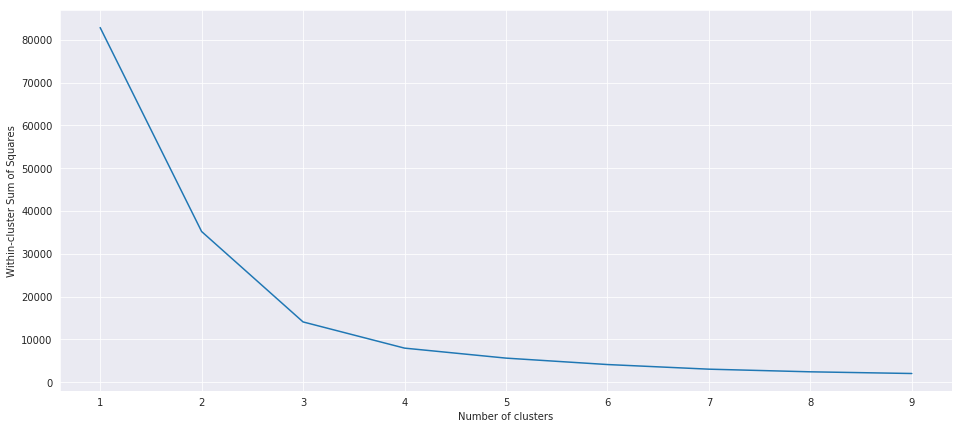

In [25]:
sns.lineplot(x = range(1,10), y =wcss,)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

From that plot, we have elbow =4, which is already we have chosen.

# Query 6.4
Prepare a separate Data frame to show which stocks belong to the same cluster

In [26]:
clustered_stocks = df_return
clustered_stocks

,Companies,Annual % returns,Annual % volatility,Cluster
0,ADANIPORTS.csv,24.882953,26.318337,2
1,ASIANPAINT.csv,0.142810,18.805987,2
2,AXISBANK.csv,19.107198,26.643537,2
3,BAJFINANCE.csv,50.986328,30.327637,1
4,BPCL.csv,-39.012922,50.613890,0
5,CIPLA.csv,10.223934,27.114375,2
6,DRREDDY.csv,-13.526690,32.176765,0
7,EICHERMOT.csv,8.151037,22.715393,2
8,GAIL.csv,34.333234,28.422518,2
9,HEROMOTOCO.csv,2.527312,17.851213,2


In [27]:
clustered_stocks.to_csv('Clustered_Stocks')